<center>

# Análisis de las jugadas

</center>

___

In [1]:
# Instalar las librerias para el analisis de las partidas
# %pip install pandas
# %pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

### Importamos el archivo con los datos y crear el DataFrame

In [3]:
archivo = "datos_de_jugadas.csv"
carpeta = os.path.join(os.getcwd(), "..", "..", "registros", archivo)

In [4]:
partidas = pd.read_csv(carpeta)

### Conocer el DataFrame

In [5]:
# Ver las columnas, cuantos registros tiene cada columna y el tipo de dato
partidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        173 non-null    float64
 1   id               173 non-null    object 
 2   evento           173 non-null    object 
 3   nombre_jugador   173 non-null    object 
 4   edad_jugador     173 non-null    int64  
 5   genero_jugador   173 non-null    object 
 6   estado           131 non-null    object 
 7   texto_ingresado  110 non-null    object 
 8   respuesta        131 non-null    object 
 9   nivel            173 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 13.6+ KB


In [6]:
partidas.head()

,timestamp,id,evento,nombre_jugador,edad_jugador,genero_jugador,estado,texto_ingresado,respuesta,nivel
0,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,inicio_partida,NEO,80,Masculino,NaN,NaN,NaN,Facil
1,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,ok,Christina Perri,Christina Perri,Facil
2,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Bazzi,Calvin Harris,Facil
3,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Selena Gomez,Rae Sremmurd,Facil
4,1.655432e+09,db74505f-3fe3-476c-866d-872fea96a3b2,intento,NEO,80,Masculino,error,Lauv,Edward Maya,Facil


In [7]:
# Para conocer las medidas de tendencia central y de dispercion de las columnas cuantitativas del DataFrame
partidas.describe()

,timestamp,edad_jugador
count,1.730000e+02,173.000000
mean,1.655599e+09,73.618497
std,1.286896e+05,14.187454
min,1.655432e+09,55.000000
25%,1.655525e+09,56.000000
50%,1.655556e+09,80.000000
75%,1.655736e+09,80.000000
max,1.655818e+09,90.000000


## Estadísticas y gráficos

* Top 10 de palabras que se encuentran primero de todas las partidas

In [8]:
def funcion():
    """calcular el tiempo de la fila actual con la fila anterior"""
    return partidas[-1]['timestamp'] - partidas[0]['timestamp']

In [9]:
# los_10 = partidas[(partidas["texto_ingresado"] == partidas["respuesta"]) & (funcion)].count()
# los_10

*  Gráfico que muestre el porcentaje de partidas por estado (error, ok, cancelado, finalizada).

In [10]:
estado = partidas['estado'].value_counts()

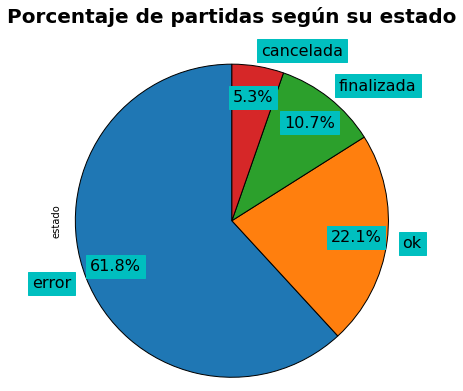

In [11]:
estado.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6), pctdistance=0.8, radius=1.2,
            textprops={'fontsize': 16, 'color': 'black', 'backgroundcolor': 'c'},
            wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title("Porcentaje de partidas según su estado", pad=35, loc="center",
          fontdict={'fontsize': 20, 'fontweight': 'bold', 'backgroundcolor': 'white'})
plt.show()

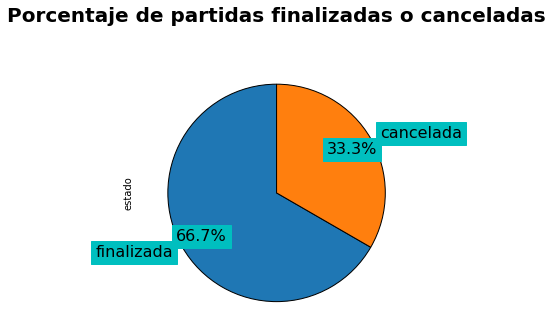

In [12]:
estado_fin = estado[['finalizada', 'cancelada']]

estado_fin.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(5, 5), pctdistance=0.8, radius=1.0,
                textprops={'fontsize': 16, 'color': 'black', 'backgroundcolor': 'c'},
                wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title("Porcentaje de partidas finalizadas o canceladas", pad=35, loc="center",
          fontdict={'fontsize': 20, 'fontweight': 'bold', 'backgroundcolor': 'white'})
plt.show()

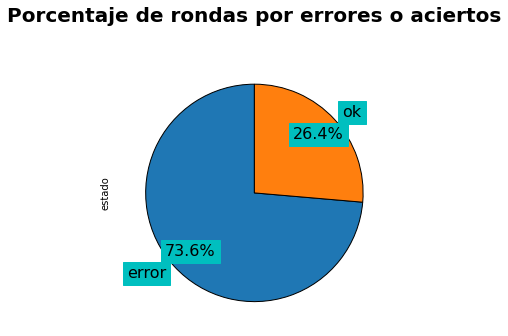

In [16]:
estado_respuestas = estado[['error', 'ok']]

estado_respuestas.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(5, 5), pctdistance=0.8, radius=1.0,
                       textprops={'fontsize': 16, 'color': 'black', 'backgroundcolor': 'c'},
                       wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title("Porcentaje de rondas por errores o aciertos", pad=35, loc="center",
          fontdict={'fontsize': 20, 'fontweight': 'bold', 'backgroundcolor': 'white'})
plt.show()

* Gráfico que muestre el porcentaje de partidas finalizadas según género.

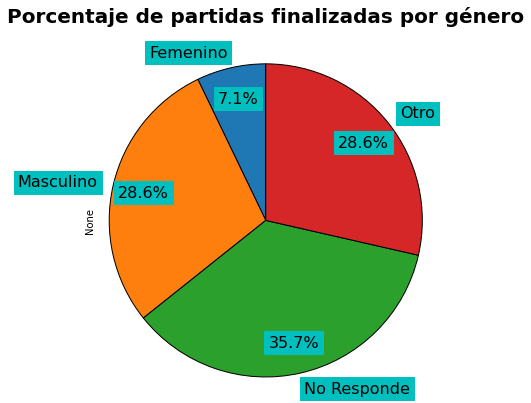

In [14]:
estado_finalizadas = partidas[partidas['estado'] == 'finalizada']
agrupar_genero = estado_finalizadas.groupby('genero_jugador')
agrupar_genero = agrupar_genero.size()

agrupar_genero.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6), pctdistance=0.8, radius=1.2,
                    textprops={'fontsize': 16, 'color': 'black', 'backgroundcolor': 'c'},
                    wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title("Porcentaje de partidas finalizadas por género", pad=35, loc="center",
          fontdict={'fontsize': 20, 'fontweight': 'bold', 'backgroundcolor': 'white'})
plt.show()

* Gráfico que muestre el porcentaje de partidas finalizadas según nivel.

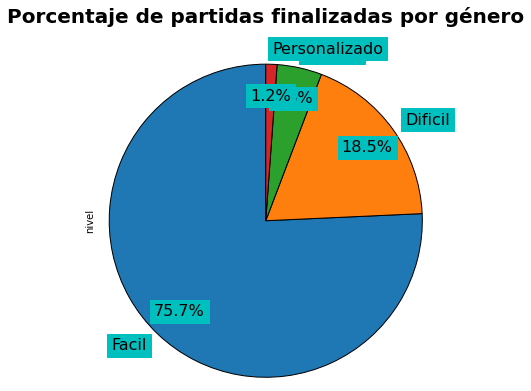

In [15]:
nivel = partidas['nivel'].value_counts()

nivel.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6), pctdistance=0.8, radius=1.2,
           textprops={'fontsize': 16, 'color': 'black', 'backgroundcolor': 'c'},
           wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title("Porcentaje de partidas finalizadas por género", pad=35, loc="center",
          fontdict={'fontsize': 20, 'fontweight': 'bold', 'backgroundcolor': 'white'})
plt.show()

* Duración total de la partida (desde que el usuarie empieza a jugar hasta que presiona
salir o pasan las N rondas definidas para el nivel de dificultad actual).

* Gráfico que muestre el porcentaje de partidas que se juegan para cada día de la semana.

* Promedio de tiempo de partidas finalizadas por nivel.

* Porcentaje de palabras encontradas en las partidas "timeout", es decir que finalizaron por falta de tiempo para completar.